In [1]:
# According to World Happiness Report in 2021, Korea shows low ladder score of happiness compare to other country with high GDP rank.
# We wondered why Korea is not so happy according to the report. And we want to know if we can be more happier.
# So we decided to analyze how and what variables are being used to calculate our happiness.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
report=pd.read_csv('world-happiness-report-2021.csv')
report # print all array

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [4]:
report.shape #show shape of the array

(149, 20)

In [5]:
report.index #show index

RangeIndex(start=0, stop=149, step=1)

In [6]:
report.columns #show all column
#Ladder score is a same as happiness score
#upperwhisker,lowerwhisker is happiness score's whisker
#Dystopia+residual is how people feel bad about their future

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [7]:
from sklearn import linear_model

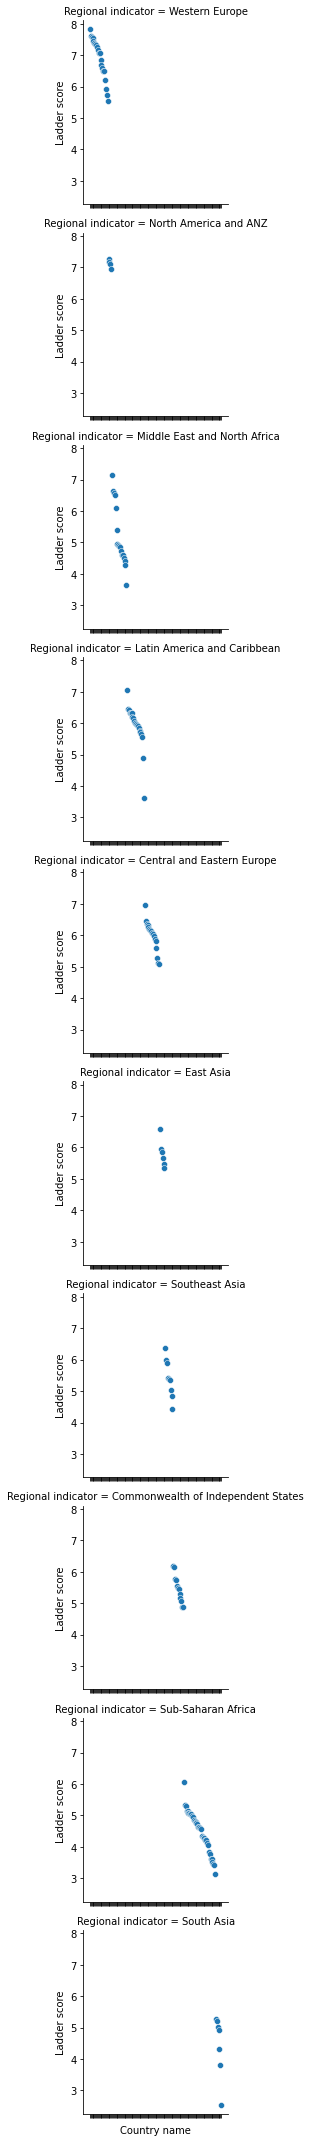

In [8]:
g=sns.FacetGrid(report,col='Regional indicator',col_wrap=1)#show Graph between country of each region and ladder score
g.map(sns.scatterplot,'Country name','Ladder score')
g.set(xticklabels=[])

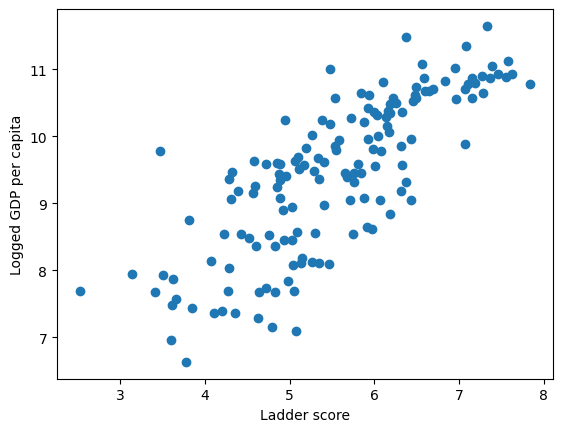

In [9]:
x=report.loc[:,'Ladder score']#The correlation between ladder score and Logged GDP per capita
y=report.loc[:,'Logged GDP per capita']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Logged GDP per capita')
plt.show()

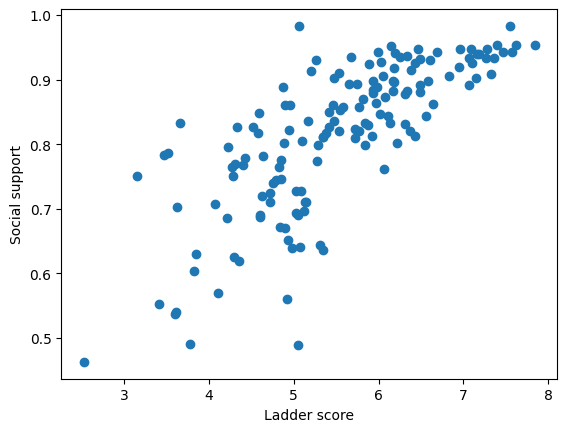

In [10]:
x=report.loc[:,'Ladder score']#The correlation between ladder score and Sccial support
y=report.loc[:,'Social support']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Social support')
plt.show()

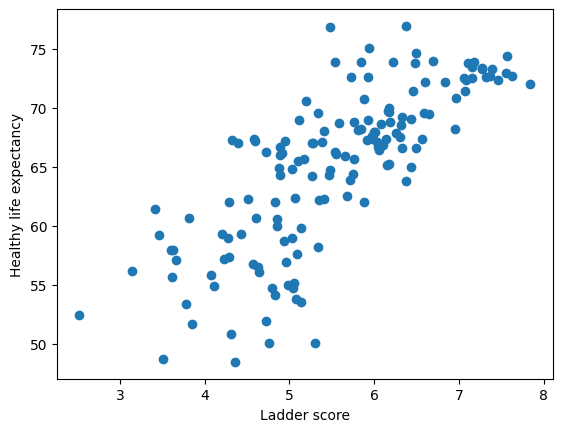

In [11]:
x=report.loc[:,'Ladder score']#The correlation between ladder score and Healthy life expectancy
y=report.loc[:,'Healthy life expectancy']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Healthy life expectancy')
plt.show()

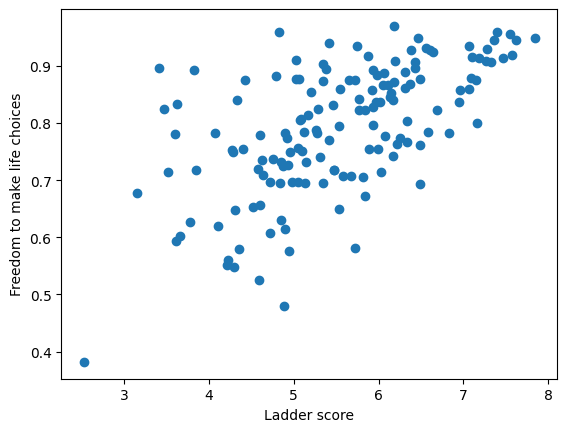

In [12]:
x=report.loc[:,'Ladder score']#The correlation between ladder score and Freedom to make life choices
y=report.loc[:,'Freedom to make life choices']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Freedom to make life choices')
plt.show()

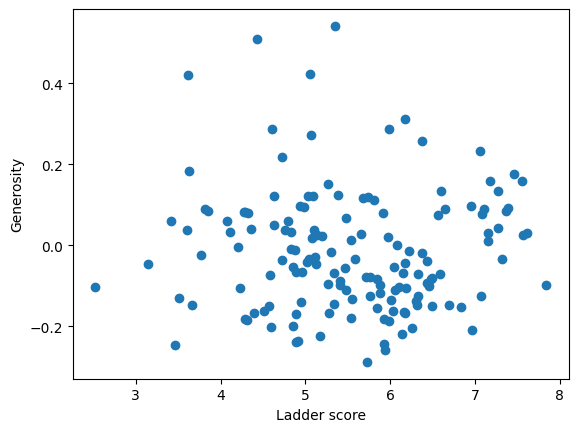

In [13]:
x=report.loc[:,'Ladder score']#The correlation between ladder score and Generosity
y=report.loc[:,'Generosity']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Generosity')
plt.show()

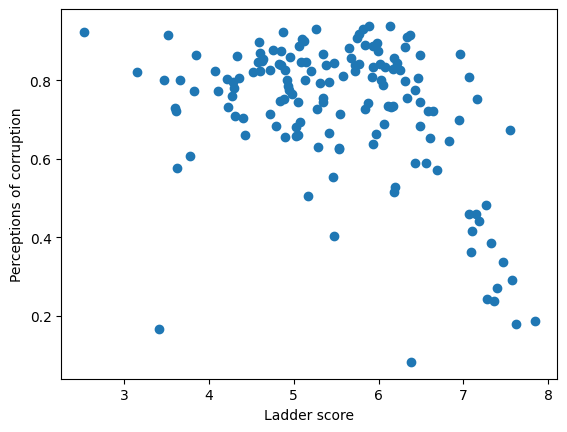

In [14]:
x=report.loc[:,'Ladder score']#The correlation between ladder score and Perception of corruption
y=report.loc[:,'Perceptions of corruption']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Perceptions of corruption')
plt.show()

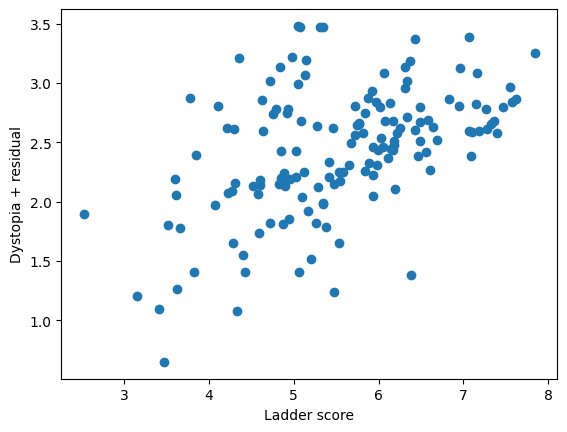

In [15]:
x=report.loc[:,'Ladder score']#The correlation between ladder score and Dystopia+residual
y=report.loc[:,'Dystopia + residual']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Dystopia + residual')
plt.show()

In [16]:
temp_report = report.drop(report.columns[3:6],axis='columns')

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X=temp_report.iloc[:,3:]
y=temp_report.iloc[:,2]
bestfeatures=SelectKBest(score_func=f_regression,k=8)
fit=bestfeatures.fit(X,y)
dfcolumns=pd.DataFrame(X.columns)
dfscores=pd.DataFrame(fit.scores_)

featureScores=pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns =['Specs','Score']
print(featureScores.nlargest(8,'Score'))

                                         Specs       Score
0                        Logged GDP per capita  243.666918
7             Explained by: Log GDP per capita  243.642327
9        Explained by: Healthy life expectancy  211.567894
2                      Healthy life expectancy  211.516275
1                               Social support  197.164694
8                 Explained by: Social support  197.141572
10  Explained by: Freedom to make life choices   86.115845
3                 Freedom to make life choices   86.097937


c:\users\oldst\pycharmprojects\datascienceproject\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


In [18]:
temp_report=temp_report.drop(temp_report.columns[9],axis='columns')
temp_report

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [19]:
df=pd.get_dummies(data=temp_report, columns=['Regional indicator'])
df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,...,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,1.446,1.106,...,0,0,0,0,0,0,0,0,0,1
1,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,1.502,1.108,...,0,0,0,0,0,0,0,0,0,1
2,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,1.566,1.079,...,0,0,0,0,0,0,0,0,0,1
3,Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673,1.482,1.172,...,0,0,0,0,0,0,0,0,0,1
4,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,1.501,1.079,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,0.451,0.731,...,0,0,0,0,0,0,0,0,1,0
145,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,1.099,0.724,...,0,0,0,0,0,0,0,0,1,0
146,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167,0.364,0.202,...,0,0,0,0,0,0,0,0,1,0
147,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,0.457,0.649,...,0,0,0,0,0,0,0,0,1,0


In [20]:
X=df.iloc[:,2:9]
y=df.iloc[:,1]
X

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita
0,10.775,0.954,72.000,0.949,-0.098,0.186,1.446
1,10.933,0.954,72.700,0.946,0.030,0.179,1.502
2,11.117,0.942,74.400,0.919,0.025,0.292,1.566
3,10.878,0.983,73.000,0.955,0.160,0.673,1.482
4,10.932,0.942,72.400,0.913,0.175,0.338,1.501
...,...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915,0.451
145,9.782,0.784,59.269,0.824,-0.246,0.801,1.099
146,7.676,0.552,61.400,0.897,0.061,0.167,0.364
147,7.943,0.750,56.201,0.677,-0.047,0.821,0.457


In [21]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_X)
train_X=scaler.transform(train_X)
test_X=scaler.transform(test_X)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca=PCA(n_components=2) # two principle components
printcipalComponents=pca.fit_transform(train_X)
pdf=pd.DataFrame(data=printcipalComponents,columns=['a','b'])#compose principle component data frame
sum(pca.explained_variance_ratio_)# sum of variance ratio 0.7521389115326861
pca.explained_variance_ratio_ #get variance ratio of 2 PC

array([0.56709755, 0.18504136])

<BarContainer object of 2 artists>

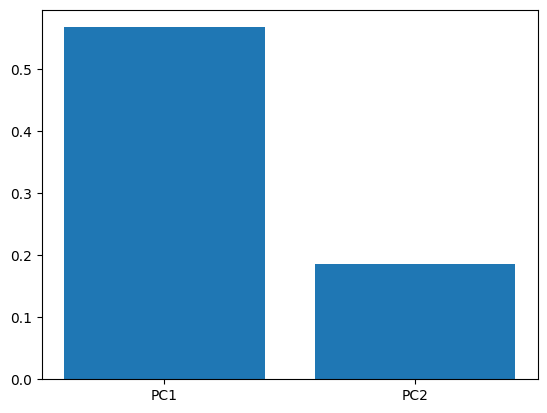

In [25]:
pca_size=2
ax=plt.subplot()
order=range(0,pca_size,1)
label=["PC"+str(i+1)for i in range(int(pca_size))]
ratio=pca.explained_variance_ratio_
plt.bar(label,ratio)

In [26]:
pca=PCA(n_components=3) #3 PC
printcipalComponents=pca.fit_transform(train_X)
pdf=pd.DataFrame(data=printcipalComponents,columns=['a','b','c'])
sum(pca.explained_variance_ratio_)#Sum of 3 variance ratio 0.8587359684840074
pca.explained_variance_ratio_# variance ratio

array([0.56709755, 0.18504136, 0.10659706])

<BarContainer object of 3 artists>

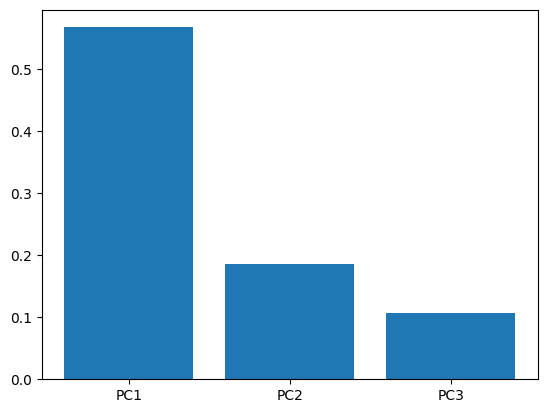

In [27]:
pca_size=3
ax=plt.subplot()
order=range(0,pca_size,1)
label=["PC"+str(i+1)for i in range(int(pca_size))]
ratio=pca.explained_variance_ratio_
plt.bar(label,ratio)

In [28]:
pca=PCA(n_components=4)
printcipalComponents=pca.fit_transform(train_X)
pdf=pd.DataFrame(data=printcipalComponents,columns=['a','b','c','d'])
sum(pca.explained_variance_ratio_)#0.9422219902105874
pca.explained_variance_ratio_

array([0.56709755, 0.18504136, 0.10659706, 0.08348602])

In [29]:
pca=PCA(n_components=5)
printcipalComponents=pca.fit_transform(train_X)
pdf=pd.DataFrame(data=printcipalComponents,columns=['a','b','c','d','e'])
sum(pca.explained_variance_ratio_)#0.9782762369039549
pca.explained_variance_ratio_


array([0.56709755, 0.18504136, 0.10659706, 0.08348602, 0.03605425])

In [30]:
pca=PCA(n_components=6)
printcipalComponents=pca.fit_transform(train_X)
pdf=pd.DataFrame(data=printcipalComponents,columns=['a','b','c','d','e','f'])
sum(pca.explained_variance_ratio_)#0.9999999578016013
pca.explained_variance_ratio_

array([0.56709755, 0.18504136, 0.10659706, 0.08348602, 0.03605425,
       0.02172372])

In [31]:
pca=PCA(n_components=7)
printcipalComponents=pca.fit_transform(train_X)
pdf=pd.DataFrame(data=printcipalComponents,columns=['a','b','c','d','e','f','g'])
#sum(pca.explained_variance_ratio_)#1.0
pca.explained_variance_ratio_


array([5.67097551e-01, 1.85041361e-01, 1.06597057e-01, 8.34860217e-02,
       3.60542467e-02, 2.17237209e-02, 4.21983987e-08])

<BarContainer object of 7 artists>

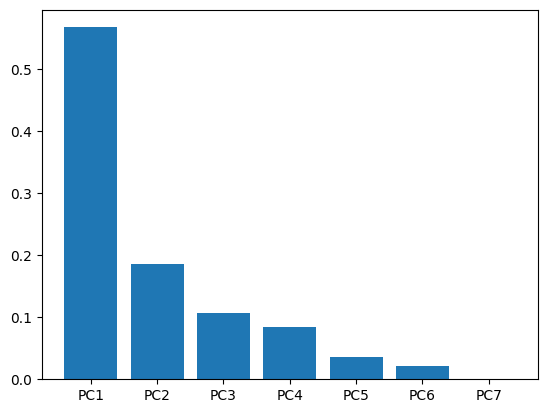

In [32]:
pca_size=7
ax=plt.subplot()
order=range(0,pca_size,1)
label=["PC"+str(i+1)for i in range(int(pca_size))]
ratio=pca.explained_variance_ratio_
plt.bar(label,ratio)

In [33]:
# in conclusion the fifth PC variance ratio is only 0.036.
#Therefore, the additional PC do not increase the amount of dispersion that can be explained
# It can be said that is is appropriate to determine 4 main components.

In [34]:
# 이 데이터를 어떻게 써야할지 모르겠네요. 칼럼명이 나오지도 않고,,,
train_img=pca.transform(train_X)
test_img=pca.transform(test_X)

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

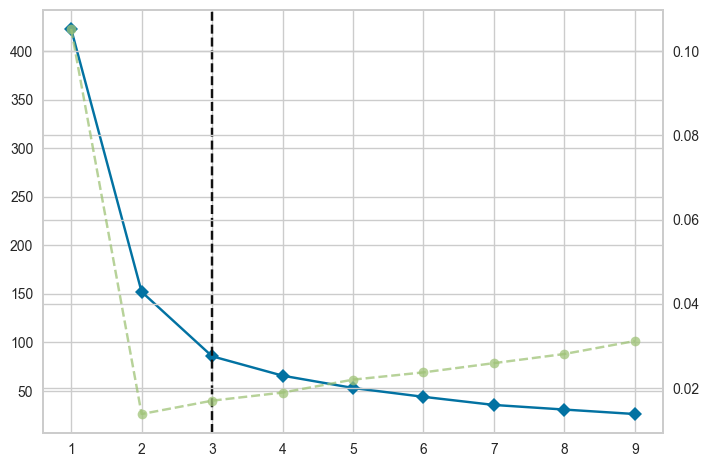

In [35]:
#this is the process of getting proper K value, that is the number of clusters

# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it’s using Matplotlib.
from yellowbrick.cluster import KElbowVisualizer
from sklearn .cluster import KMeans

model = KMeans()
# Visualizers are the core objects in Yellowbrick.
# Visualizers can wrap a model estimator
# https://www.scikit-yb.org/en/latest/

df_GL = temp_report.iloc[:, 3:9]
df_GL_mean = pd.DataFrame(data = df_GL.mean(axis='columns'), columns=['mean'])
df_ladder_score = temp_report.loc[:, 'Ladder score']
df = pd.concat([df_GL_mean, df_ladder_score], axis=1)

#K-Elbow Plot : select k using the elbow method and various metrics
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df)

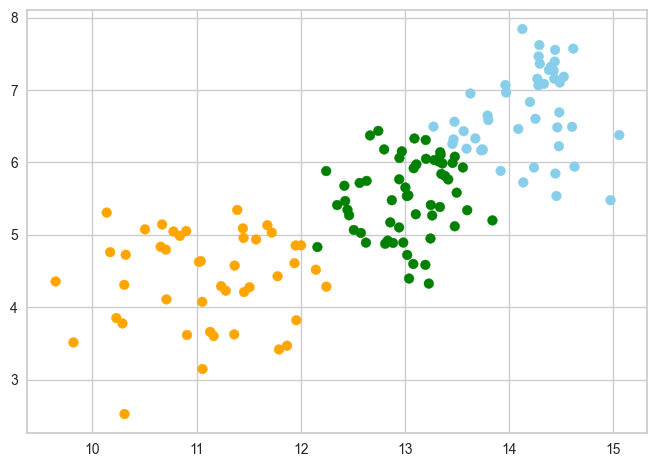

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,cluster
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,0.451,0.731,0.007,0.405,0.103,0.015,1.800,1
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,1.099,0.724,0.340,0.539,0.027,0.088,0.648,1
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,0.364,0.202,0.407,0.627,0.227,0.493,1.095,1
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,0.457,0.649,0.243,0.359,0.157,0.075,1.205,1


In [36]:
# clustering part

from sklearn .cluster import KMeans
df_GL = temp_report.iloc[:, 3:9]
df_GL_mean = pd.DataFrame(data = df_GL.mean(axis='columns'), columns=['mean'])
# df_GL_mean is the mean value of column G to Column L's sum

# this mean value will be the x, because it has positive relation with Ladder score.
df_ladder_score = temp_report.loc[:, 'Ladder score']
df = pd.concat([df_GL_mean, df_ladder_score], axis=1)

# we know that n_cluster's number will be good when it is 3, we will describe it soon
KMeans = KMeans(n_clusters=3).fit(df)

colors = []
for i in KMeans.labels_:
  if i == 0:
    colors.append('skyblue')
  elif i == 1:
    colors.append('orange')
  elif i == 2:
    colors.append('green')

plt.scatter(df['mean'], df['Ladder score'], c=colors)
plt.show()


df_cluster = pd.DataFrame(data = KMeans.labels_, columns=['cluster'])
clustered_report = pd.DataFrame(data=temp_report)
clustered_report = pd.concat([clustered_report, df_cluster], axis=1)
# dataset that includes cluster information
clustered_report

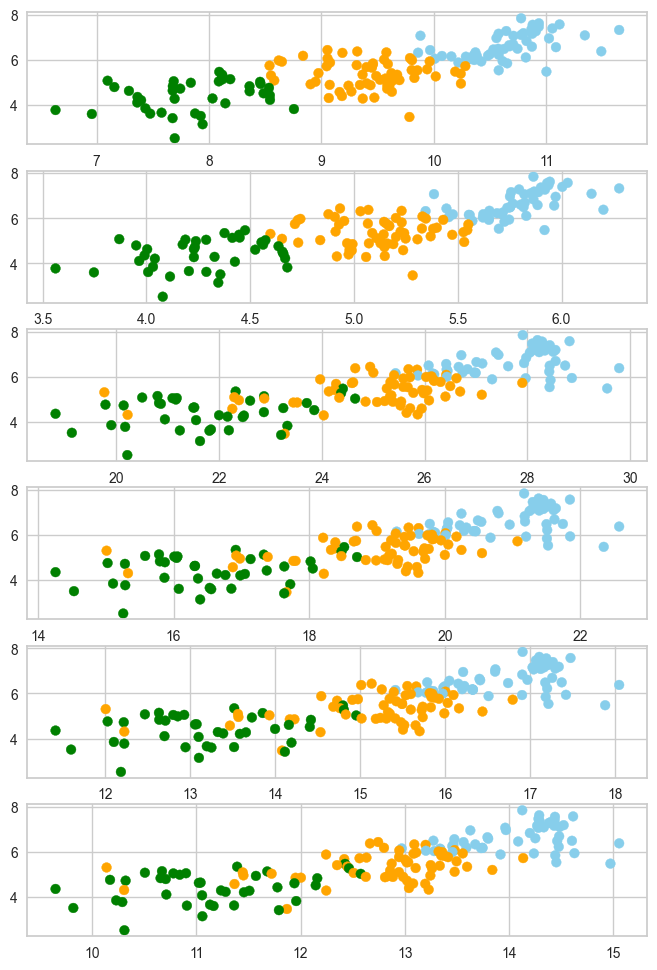

In [37]:
# and these are the cases that incremental average values that will be the x value

from sklearn .cluster import KMeans

colors = []
f_ladder_score = temp_report.loc[:, 'Ladder score']
df = pd.concat([df_GL_mean, df_ladder_score], axis=1)

# we know that n_cluster's number will be good when it is 3, we will describe it soon

fig, ax = plt.subplots(6, figsize=(8,12))
j = 0
for i in range(4,10) :
  inc_df = temp_report.iloc[:, 3:i]
  inc_df_GL_mean = pd.DataFrame(data = inc_df.mean(axis='columns'), columns=['mean'])
  dataframe = pd.concat([inc_df_GL_mean, df_ladder_score], axis=1)
  inc_KMeans = KMeans(n_clusters=3).fit(dataframe)
  if(i == 4):
    for k in inc_KMeans.labels_:
     if k == 0:
        colors.append('skyblue')
     elif k == 1:
        colors.append('orange')
     elif k == 2:
        colors.append('green')

  ax[j].scatter(dataframe['mean'], dataframe['Ladder score'], c=colors)
  j += 1
plt.show()

In [38]:
# we can see the top 2 sub plot is the best cases.
# Which means it's good to take GDP alone, or use GDP and social support as an average.